In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# !pip install patchify


In [ ]:
# !pip install opencv-python

In [ ]:
# !pip install wandb 

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


In [2]:
dataset_root_folder = 'F:\AI Courses\Test\datasets\Satellite/'

In [3]:
dataset_name = 'DubaiDataset'

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 #print(dir_name)
  if dir_name == 'masks': #images
   images=os.listdir(path)
   print(path)
   #print(images)
   for i,image_name in enumerate(images):
    if image_name.endswith('.png'): #jpg
     #print(image_name)
     a=True

F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 1\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 2\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 3\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 4\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 5\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 6\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 7\masks
F:\AI Courses\Test\datasets\Satellite/DubaiDataset\Tile 8\masks


In [6]:
image_patch_size=256

In [7]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [12]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [13]:
len(image_patches)

2

In [14]:
image_dataset=[]
mask_dataset=[]
for image_type in ['images','masks']:
  if image_type=='images':
   image_extestion='jpg'
  elif image_type=='masks':
   image_extestion='png'
  for tile_id in range(1,8):
    for image_id in range (1,20):
      image =cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extestion}',1)
      if image is not None:
        if image_type=='masks':
         image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print('{}---- {} -- {}'.format(image.shape,size_x,size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('{} , {}'.format(image.size[0],image.size[1]))
        image=np.array(image)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =individual_patched_image [0]
              #print(individual_patched_image )
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [15]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [16]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [17]:
type(image_dataset[0])

numpy.ndarray

In [18]:
type(np.reshape(image_dataset[0],image_patch_size*image_patch_size*3))

numpy.ndarray

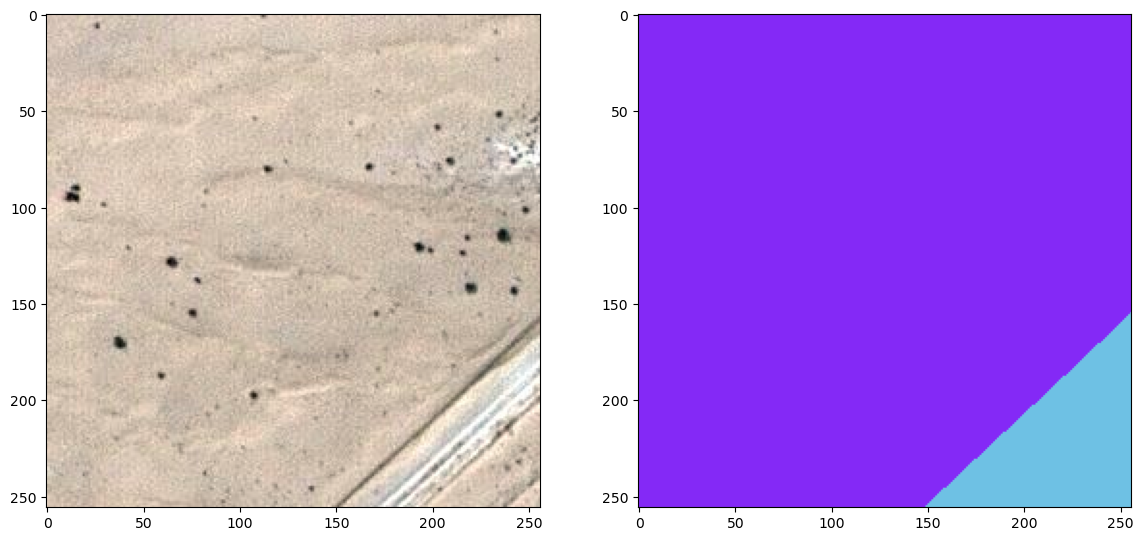

In [19]:
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [20]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
#3C1098
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
#8429F6
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
#6EC1E4
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_Vegetation='#FEDD3A'
class_Vegetation=class_Vegetation.lstrip('#')
#FEDD3A
class_Vegetation=np.array(tuple(int(class_Vegetation[i:i+2],16) for i in (0,2,4)))
print(class_Vegetation)

class_Water='#E2A929'
class_Water=class_Water.lstrip('#')
#E2A929
class_Water=np.array(tuple(int(class_Water[i:i+2],16) for i in (0,2,4)))
print(class_Water)


class_Unlabeled='#9B9B9B'
class_Unlabeled=class_Unlabeled.lstrip('#')
#9B9B9B
class_Unlabeled=np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [33]:
mask_dataset.shape[0]

945

In [35]:
label=individual_patched_mask

In [37]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_Water,axis=-1)]=0
  label_segment[np.all(label==class_land,axis=-1)]=1
  label_segment[np.all(label==class_road,axis=-1)]=2
  label_segment[np.all(label==class_building,axis=-1)]=3
  label_segment[np.all(label==class_Vegetation,axis=-1)]=4
  label_segment[np.all(label==class_Unlabeled,axis=-1)]=5
  #print(label_segment)
  label_segment=label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [39]:
labels=[]
for i in range (mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [40]:
labels=np.expand_dims(labels,axis=3)

In [41]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [42]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [43]:
print('The label unique value is: ',format(np.unique(labels)))

The label unique value is:  [0 1 2 3 4 5]


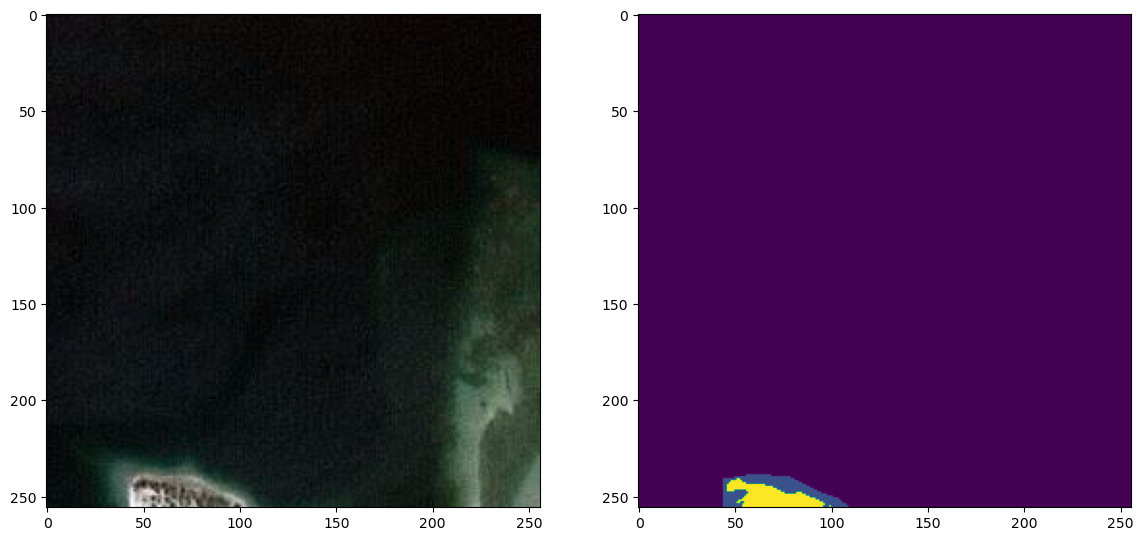

In [44]:

random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [45]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [46]:
total_classes=len(np.unique(labels))

In [47]:
total_classes

6

In [48]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [49]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [50]:
master_trianing_dataset = image_dataset


In [51]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(master_trianing_dataset ,labels_categorical_dataset, test_size=0.15, random_state=100)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [54]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [55]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [56]:
# !pip install -U segmentation-models

In [57]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [58]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [59]:
# from keras import backend as K
from tensorflow.keras import backend as K


In [60]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [61]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [62]:
metrics = ["accuracy", Jaccard_coef ]


In [63]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [64]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [65]:
model = get_deep_learning_model()

In [66]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [67]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [68]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [69]:
total_loss = dice_loss + (1 * focal_loss)


In [73]:
import tensorflow as tf

In [74]:
# tf.compat.v1.reset_default_graph()

In [75]:
tf.keras.backend.clear_session()


In [77]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [78]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(x_test, y_test),
                          shuffle=False)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.4760 - jaccard_coef: 0.2296 - loss: 1.0072 - val_accuracy: 0.6271 - val_jaccard_coef: 0.3541 - val_loss: 0.9833
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.6412 - jaccard_coef: 0.3740 - loss: 0.9795 - val_accuracy: 0.7269 - val_jaccard_coef: 0.4847 - val_loss: 0.9604
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - accuracy: 0.7250 - jaccard_coef: 0.4805 - loss: 0.9601 - val_accuracy: 0.7311 - val_jaccard_coef: 0.4931 - val_loss: 0.9556
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.7422 - jaccard_coef: 0.5115 - loss: 0.9535 - val_accuracy: 0.7188 - val_jaccard_coef: 0.5045 - val_loss: 0.9603
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.7552 - jaccard_coef: 0.5248 - loss: 0.9500 - val_accuracy: 0.7252 - val_jaccard_coef: 0.4942 - val_loss: 0.9558
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.7703 - jaccard_coef: 0.5470 - loss: 0.9451 -

In [113]:
history_a=model_history
history_a.history

{'accuracy': [0.5628675818443298,
  0.6754928827285767,
  0.7244588136672974,
  0.7442900538444519,
  0.7568289637565613,
  0.770908772945404,
  0.7858791947364807,
  0.8018008470535278,
  0.8089820146560669,
  0.8149439692497253,
  0.8201696872711182,
  0.8194766044616699,
  0.827392578125,
  0.8299141526222229,
  0.8344287276268005,
  0.8382894396781921,
  0.8391281366348267,
  0.8400545716285706,
  0.8444504141807556,
  0.8468232154846191,
  0.849787712097168,
  0.851184606552124,
  0.8540632128715515,
  0.8536068201065063,
  0.8561066389083862,
  0.8593015670776367,
  0.8626115918159485,
  0.8640070557594299,
  0.864463746547699,
  0.8615049719810486,
  0.8624644875526428,
  0.8650727272033691,
  0.865774929523468,
  0.8687885403633118,
  0.8637605905532837,
  0.8683573007583618,
  0.8705891966819763,
  0.871446430683136,
  0.8696176409721375,
  0.8517795205116272,
  0.8677729368209839,
  0.871349036693573,
  0.8715972304344177,
  0.870559573173523,
  0.8674035668373108,
  0.875673

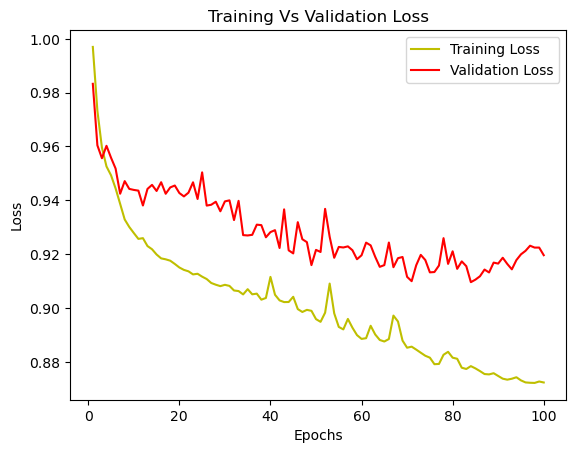

In [115]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

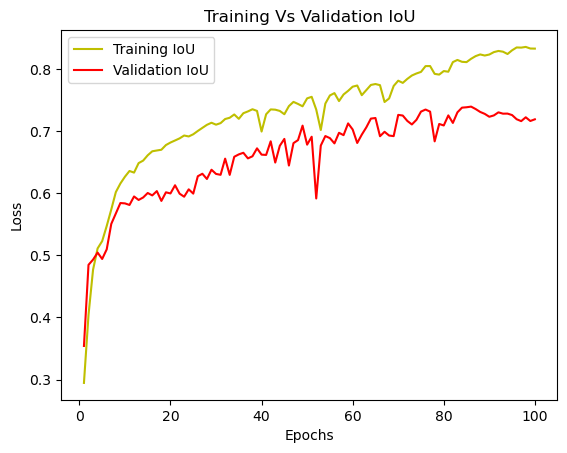

In [116]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [119]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [121]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [122]:
len(y_pred)

142

In [125]:
# y_pred

In [127]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [129]:
len(y_pred_argmax)

142

In [131]:
# y_pred_argmax

In [133]:
y_test_argmax = np.argmax(y_test, axis=3)

In [135]:
# y_test_argmax

In [187]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

# prediction = model.predict(test_image_input)
prediction = saved_model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


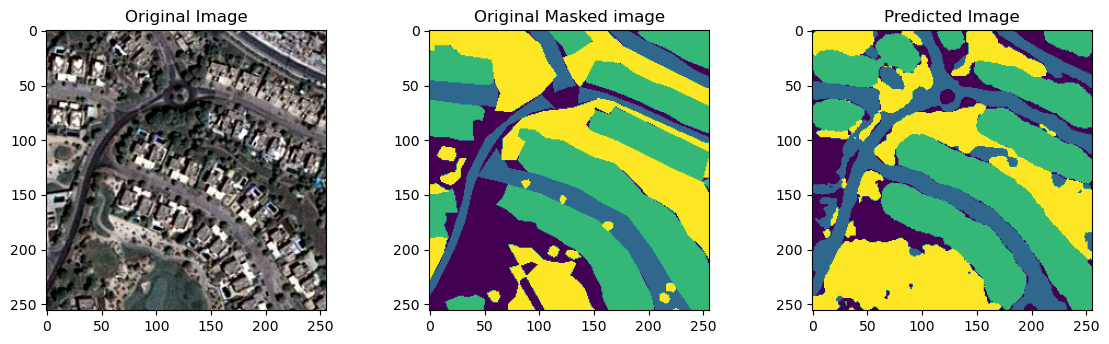

In [189]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [ ]:
# #Model saving and reloading (with custom loss and custom metrics)
# loss
# 'dice_loss_plus_1focal_loss': total_loss
# Metrics
# jaccard_coef: jaccard_coef

In [173]:
from tensorflow.keras.saving import save_model
from IPython.display import FileLink

# Save the model
model.save('my_model.h5')

# Generate a link to download the file
FileLink('my_model.h5')

C:\Users\Lenovo\Deep_satellite_imagery\my_model.h5

In [167]:
from tensorflow.keras.models import load_model 


In [197]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [179]:
saved_model = load_model('C:\\Users\\Lenovo\\Downloads\\my_model.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'Jaccard_coef': Jaccard_coef}))

In [191]:
saved_model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

In [193]:
#Performing Prediction using the custom image from Google Map: